# Sales Analysis

In [1]:
import pandas as pd

 task1: merge 12 csv folder in one folder

In [3]:
ab = pd.read_csv(r"/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
ab.head()
ab.shape

(18383, 6)

In [5]:
import glob

In [7]:
csv_dosyaları = glob.glob("/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/*.csv")
csv_dosyaları

['/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv',
 '/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv',
 '/Users/ruveyda/Deskt

In [9]:
df_liste = [] 

In [11]:
for file in csv_dosyaları:
    df = pd.read_csv(file)
    df_liste.append(df)


In [13]:
df = pd.concat(df_liste, ignore_index = True)

In [15]:
df.to_csv("birlesik_dosya.csv", index = False)

In [17]:
df.shape

(186850, 6)

In [19]:
df = pd.read_csv(r"/Users/ruveyda/Desktop/project_python/Pandas-Data-Science-Tasks-master/SalesAnalysis/birlesik_dosya.csv")

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [23]:
df_na = df[df.isna().any(axis = 1)]

In [25]:
df_na

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = df.dropna(how = 'all')

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Removing duplicates header rows

In [31]:
df_temp = df[df["Order Date"].str[0:2] == "Or"]
df_temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [33]:
df = df[df["Order Date"].str[0:2] != "Or"]

#### Convert the data type 

In [35]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [37]:
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

### Creating new column

In [39]:
df["Month"] = df["Order Date"].str.split('/').str.get(0)


In [41]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [43]:
df["Month"] = df["Month"].astype("int32")

#### Add sales column

In [45]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Q1: What was the best month for sales? How much was earned that month?

In [49]:
df.groupby("Month")["Sales"].sum().sort_values(ascending = False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

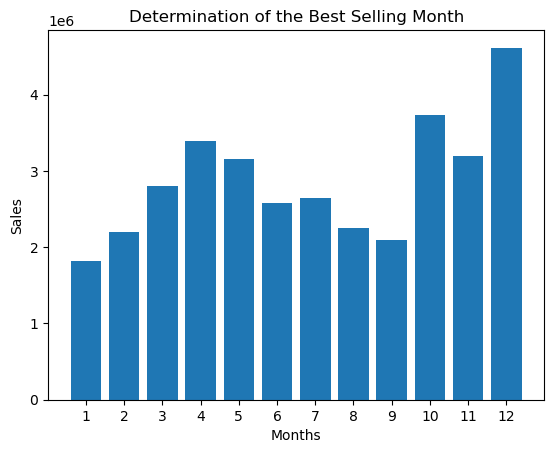

In [51]:
import matplotlib.pyplot as plt
results = df.groupby("Month")["Sales"].sum()

plt.bar(results.index, results.values)
plt.xticks(results.index)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Determination of the Best Selling Month")
plt.show()

#### Q2: What city had the highest number of sales? 

In [73]:
df["City"] = df["Purchase Address"].str.split(',').str.get(1)

In [77]:
df.groupby("City")["Sales"].sum().sort_values(ascending = False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales based on Cities')

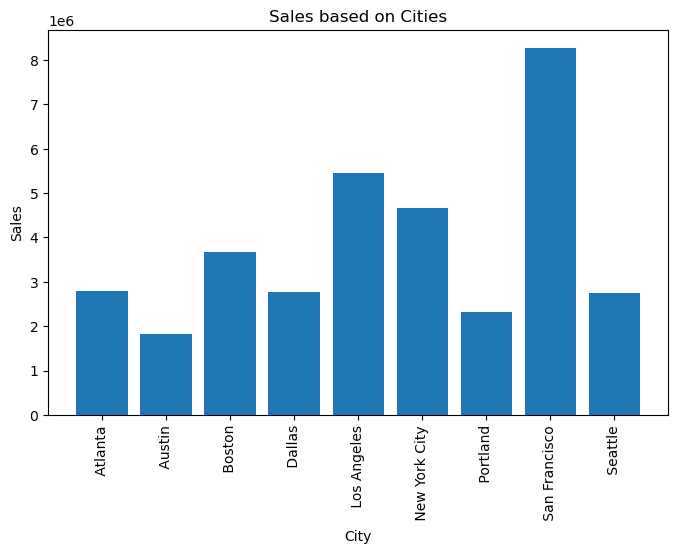

In [93]:
results = df.groupby("City")["Sales"].sum()
cities = df["City"].unique()
plt.figure(figsize=(8,5))
plt.bar(results.index, results.values)
plt.xticks(cities, rotation = 'vertical')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales based on Cities")

#### Q3: What time should display advertisements to maximize likelihood of customer's buying product? 

In [103]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [109]:
df["Hour"] = df["Order Date"].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [119]:
df.groupby("Hour")["Sales"].sum().sort_values()

Hour
3      145757.89
4      162661.01
5      230679.82
2      234851.44
6      448113.00
1      460866.88
0      713721.27
7      744854.12
23    1179304.44
8     1192348.97
22    1607549.21
9     1639030.58
16    1904601.31
15    1941549.60
10    1944286.77
21    2042000.86
14    2083672.73
17    2129361.61
13    2155389.80
18    2219348.30
20    2281716.24
11    2300610.24
12    2316821.34
19    2412938.54
Name: Sales, dtype: float64

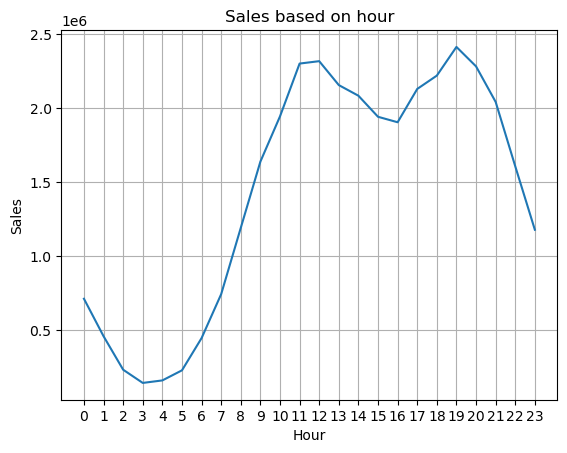

In [125]:
results  = df.groupby("Hour")["Sales"].sum()
hour = df["Hour"].unique()
plt.plot(results.index , results.values)
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title("Sales based on hour")
plt.grid()
plt.show()

#### Q4: What products are the most often sold together?

In [139]:
double = df[df["Order ID"].duplicated(keep = False)]
double["Grouped"] = double.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

/var/folders/6h/b7k80vt12jbggrr00k49s1hm0000gn/T/ipykernel_74532/2049082039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  double["Grouped"] = double.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [149]:
double = double[["Order ID","Grouped"]].drop_duplicates()

In [161]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in double["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5: What product sold the most? Why do you think it sold the most?

In [170]:
product_group = df.groupby("Product")
product_group.sum(numeric_only = True).sort_values("Quantity Ordered", ascending = False)

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


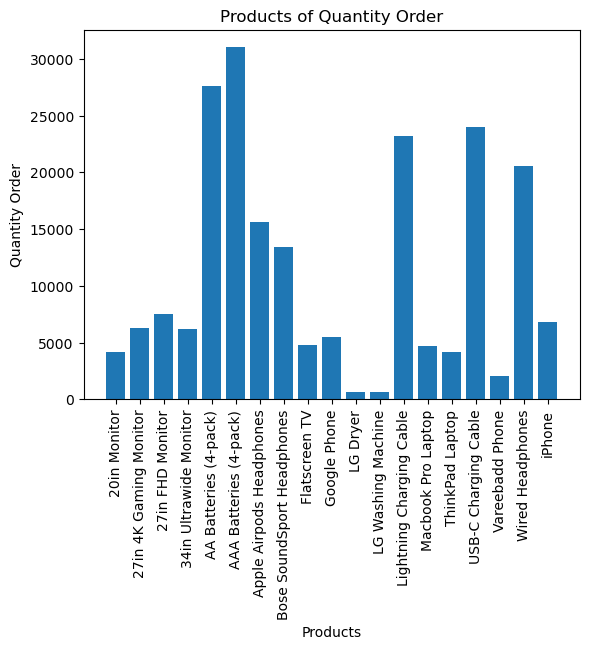

In [180]:
product_group = df.groupby("Product")
quantity_ordered = product_group.sum(numeric_only =True)["Quantity Ordered"]
products = [product for product, double in product_group]
plt.bar(products, quantity_ordered)
plt.xlabel("Products")
plt.ylabel("Quantity Order")
plt.title("Products of Quantity Order")
plt.xticks(rotation ='vertical')
plt.show()

In [190]:
price = df.groupby("Product")["Price Each"].mean()

In [194]:
price.sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

/var/folders/6h/b7k80vt12jbggrr00k49s1hm0000gn/T/ipykernel_74532/2452387863.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


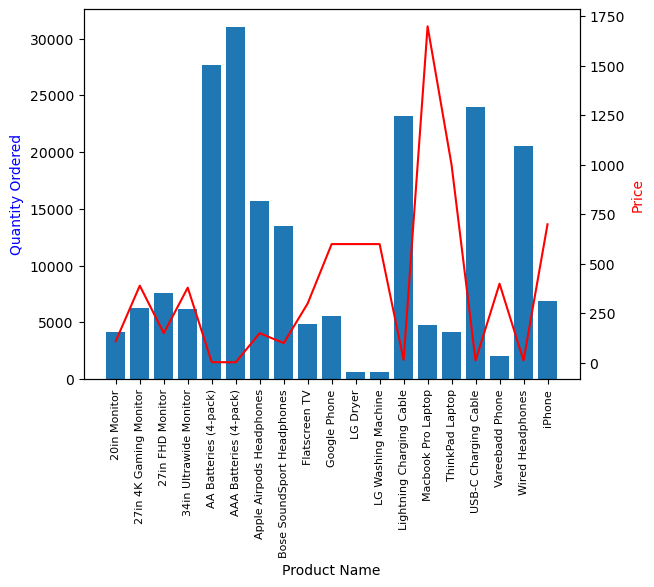

In [206]:
price = df.groupby("Product")["Price Each"].mean() 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, price,'r-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax2.set_ylabel("Price", color='r')
plt.show()